# Proyek Predictive Analytics: [Student Habits vs Academic Performance Dataset]
- **Nama:** Rizka Alfadilla
- **Email:** rizkaal874@gmail.com
- **ID Dicoding:** rizka_alfadilla

## Import Semua Packages/Library yang Digunakan

In [22]:
# Library yang sering digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform, randint

## Data Loading

Dataset = https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data

In [2]:
# Load hour.csv dari folder data dan tampilkan
df = pd.read_csv('student_habits_performance.csv')
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


### Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [5]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [6]:
# Membuat dataframe untuk kondisi dataset
dataset_info = pd.DataFrame({
    "Tipe Data": df.dtypes,
    "Jumlah Missing": df.isnull().sum(),
    "Jumlah Unik": df.nunique(),
    "Nilai Unik Contoh": [df[col].unique()[:5].tolist() for col in df.columns]
})

dataset_info

,Tipe Data,Jumlah Missing,Jumlah Unik,Nilai Unik Contoh
student_id,object,0,1000,"[S1000, S1001, S1002, S1003, S1004]"
age,int64,0,8,"[23, 20, 21, 19, 24]"
gender,object,0,3,"[Female, Male, Other]"
study_hours_per_day,float64,0,78,"[0.0, 6.9, 1.4, 1.0, 5.0]"
social_media_hours,float64,0,60,"[1.2, 2.8, 3.1, 3.9, 4.4]"
netflix_hours,float64,0,51,"[1.1, 2.3, 1.3, 1.0, 0.5]"
part_time_job,object,0,2,"[No, Yes]"
attendance_percentage,float64,0,320,"[85.0, 97.3, 94.8, 71.0, 90.9]"
sleep_hours,float64,0,68,"[8.0, 4.6, 9.2, 4.9, 7.4]"
diet_quality,object,0,3,"[Fair, Good, Poor]"


In [7]:
# Melihat jumlah missing values sebelum imputasi
print("Jumlah missing values sebelum imputasi:")
print(df['parental_education_level'].isnull().sum())

# Imputasi missing values dengan 'Unknown'
# Mengatasi warning dengan assignment langsung
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

# Melihat jumlah missing values setelah imputasi
print("\nJumlah missing values setelah imputasi:")
print(df['parental_education_level'].isnull().sum())

# Mengecek distribusi setelah imputasi
print("\nDistribusi 'parental_education_level' setelah imputasi:")
print(df['parental_education_level'].value_counts())

Jumlah missing values sebelum imputasi:
91

Jumlah missing values setelah imputasi:
0

Distribusi 'parental_education_level' setelah imputasi:
parental_education_level
High School    392
Bachelor       350
Master         167
Unknown         91
Name: count, dtype: int64


In [8]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# Fitur numerik
numerical_features = ['age', 'study_hours_per_day', 'social_media_hours',
                      'netflix_hours', 'attendance_percentage', 'sleep_hours',
                      'exercise_frequency', 'mental_health_rating', 'exam_score']
# Fitur kategorikal
categorical_features = ['gender', 'part_time_job', 'diet_quality',
                        'parental_education_level', 'internet_quality',
                        'extracurricular_participation']


Distribusi untuk fitur: gender

        jumlah sampel  persentase
gender                           
Female            481        48.1
Male              477        47.7
Other              42         4.2
--------------------------------------------------


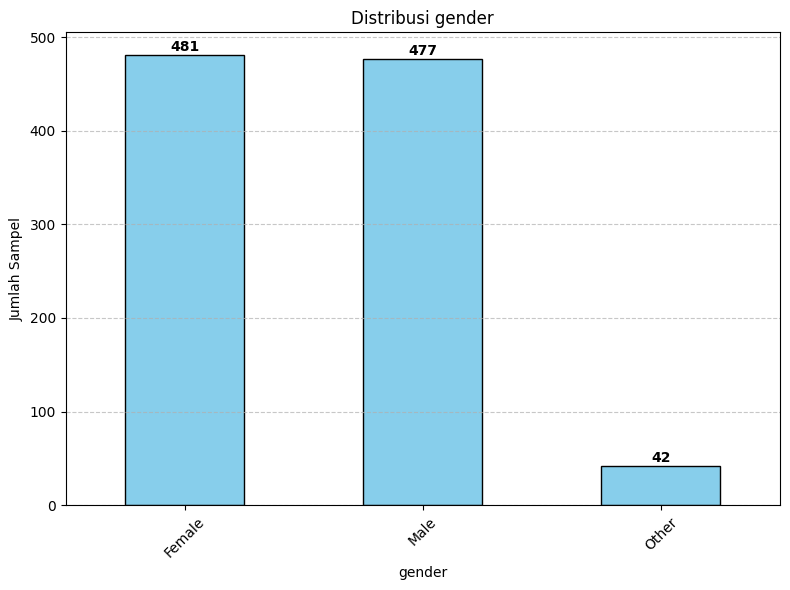


Distribusi untuk fitur: part_time_job

               jumlah sampel  persentase
part_time_job                           
No                       785        78.5
Yes                      215        21.5
--------------------------------------------------


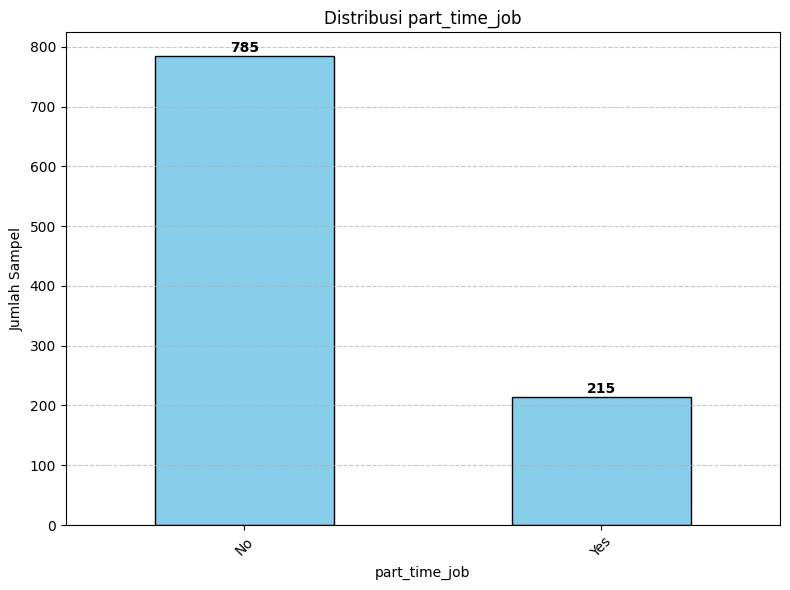


Distribusi untuk fitur: diet_quality

              jumlah sampel  persentase
diet_quality                           
Fair                    437        43.7
Good                    378        37.8
Poor                    185        18.5
--------------------------------------------------


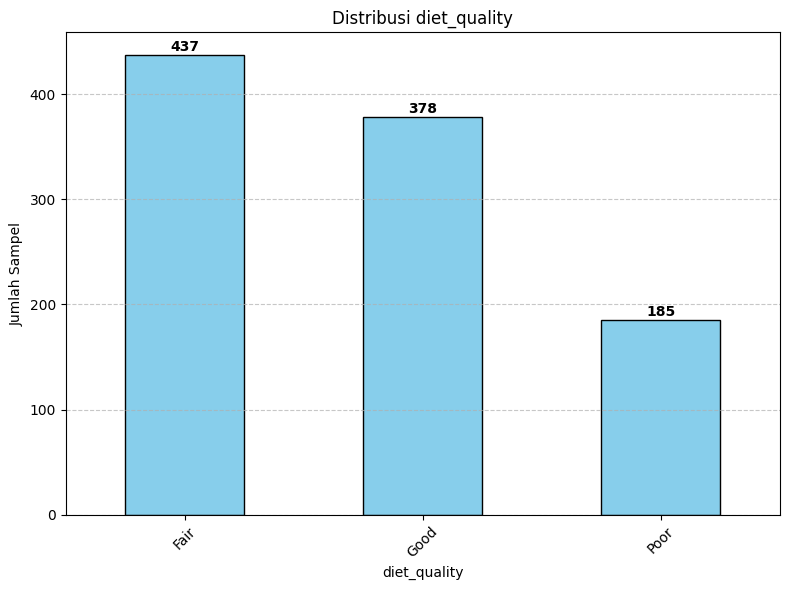


Distribusi untuk fitur: parental_education_level

                          jumlah sampel  persentase
parental_education_level                           
High School                         392        39.2
Bachelor                            350        35.0
Master                              167        16.7
Unknown                              91         9.1
--------------------------------------------------


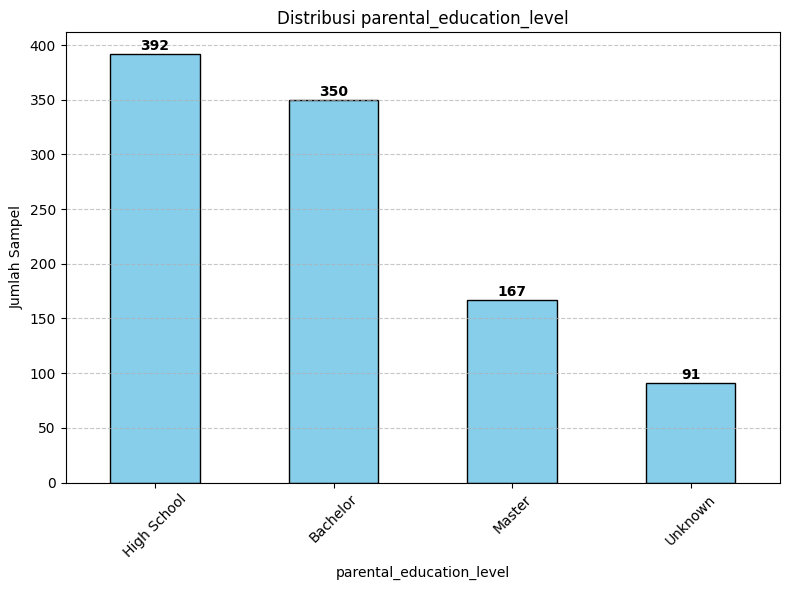


Distribusi untuk fitur: internet_quality

                  jumlah sampel  persentase
internet_quality                           
Good                        447        44.7
Average                     391        39.1
Poor                        162        16.2
--------------------------------------------------


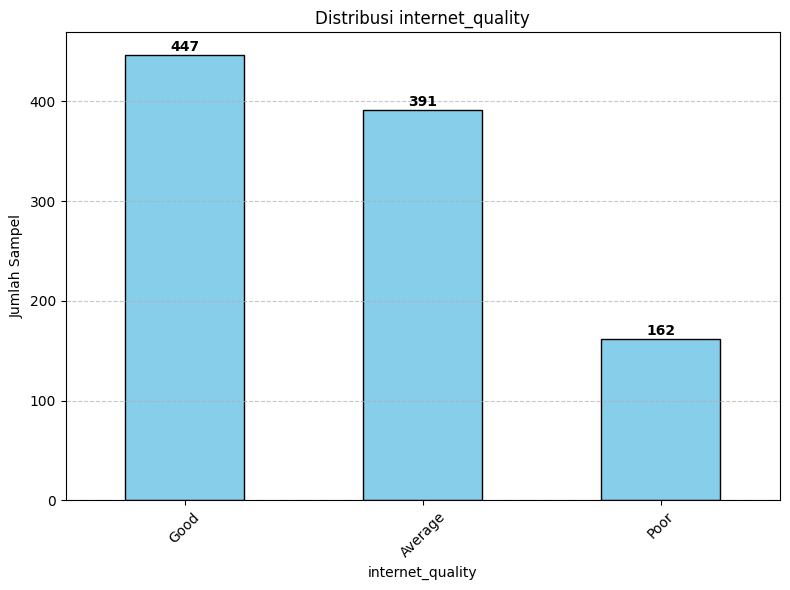


Distribusi untuk fitur: extracurricular_participation

                               jumlah sampel  persentase
extracurricular_participation                           
No                                       682        68.2
Yes                                      318        31.8
--------------------------------------------------


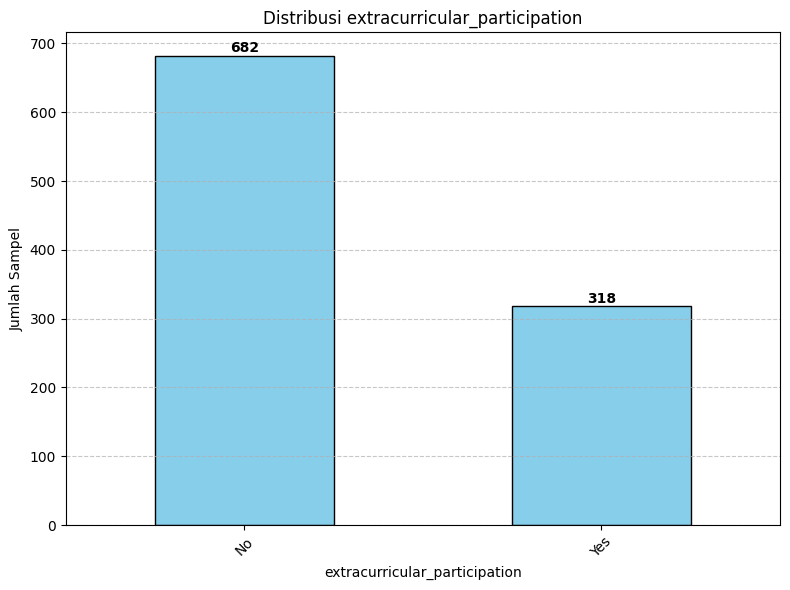

In [10]:
# Loop untuk setiap fitur kategorikal
for feature in categorical_features:
    # Hitung jumlah sampel dan persentase
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)

    # Membuat dataframe untuk visualisasi
    df_cat = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"\nDistribusi untuk fitur: {feature}\n")
    print(df_cat)
    print("-" * 50)

    # Visualisasi bar plot
    plt.figure(figsize=(8, 6))
    ax = count.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel("Jumlah Sampel")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan jumlah sampel di atas bar
    for i, val in enumerate(count):
        plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    plt.tight_layout()
    plt.show()

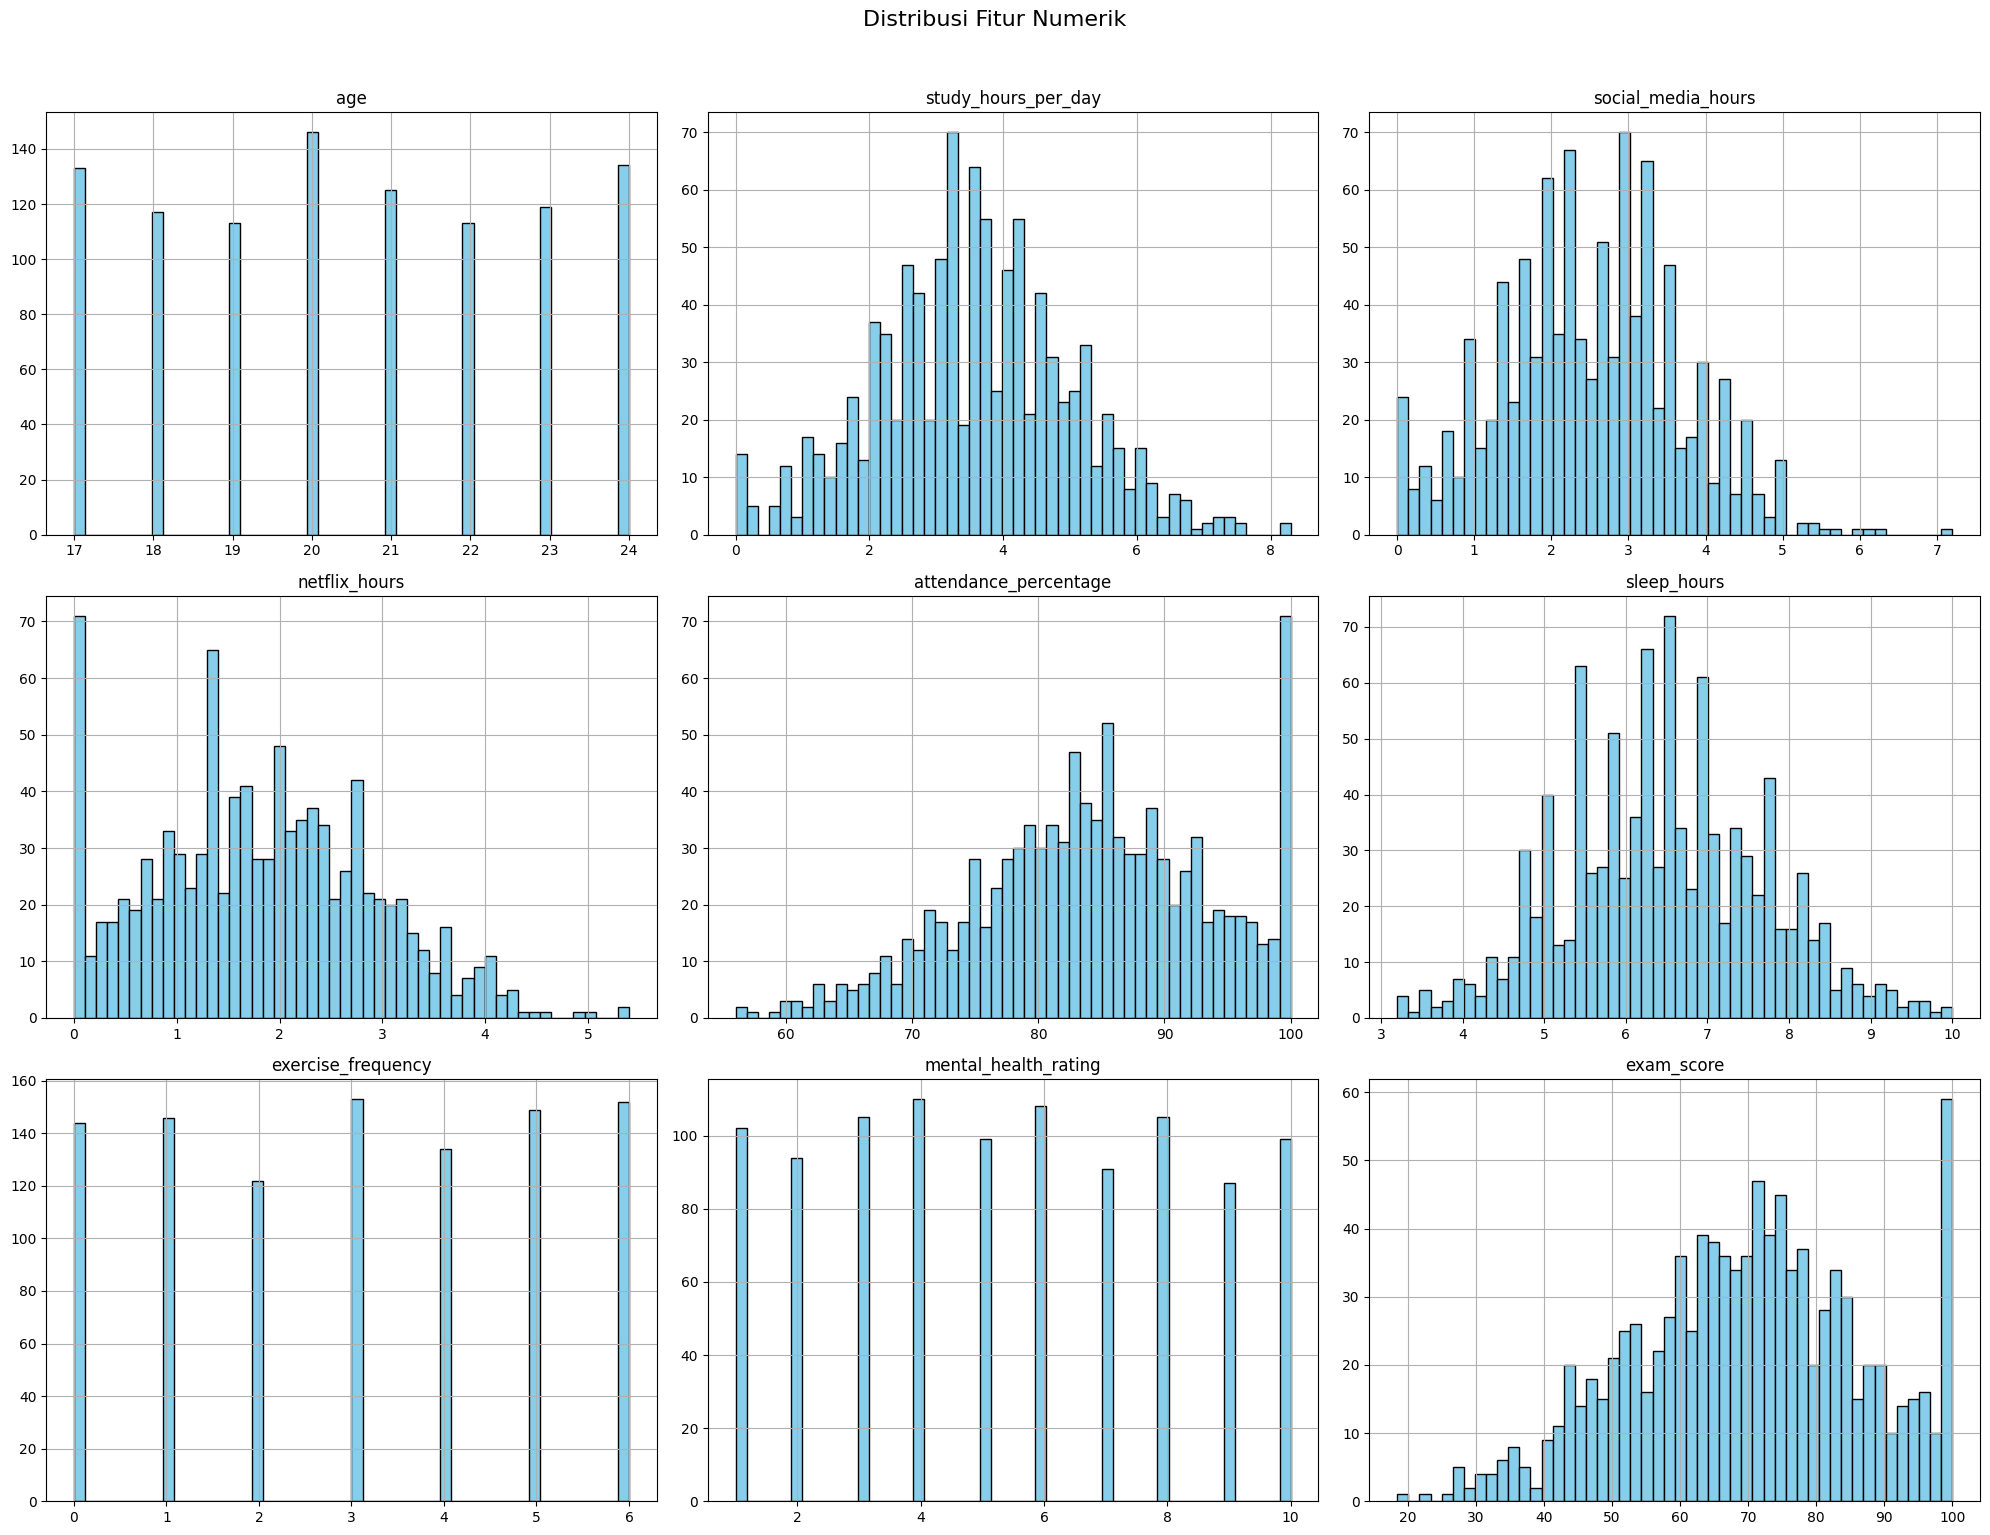

In [11]:
# Visualisasi histogram untuk semua fitur numerik
df[numerical_features].hist(bins=50, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<ipython-input-12-c93b764cccca>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)
<ipython-input-12-c93b764cccca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)


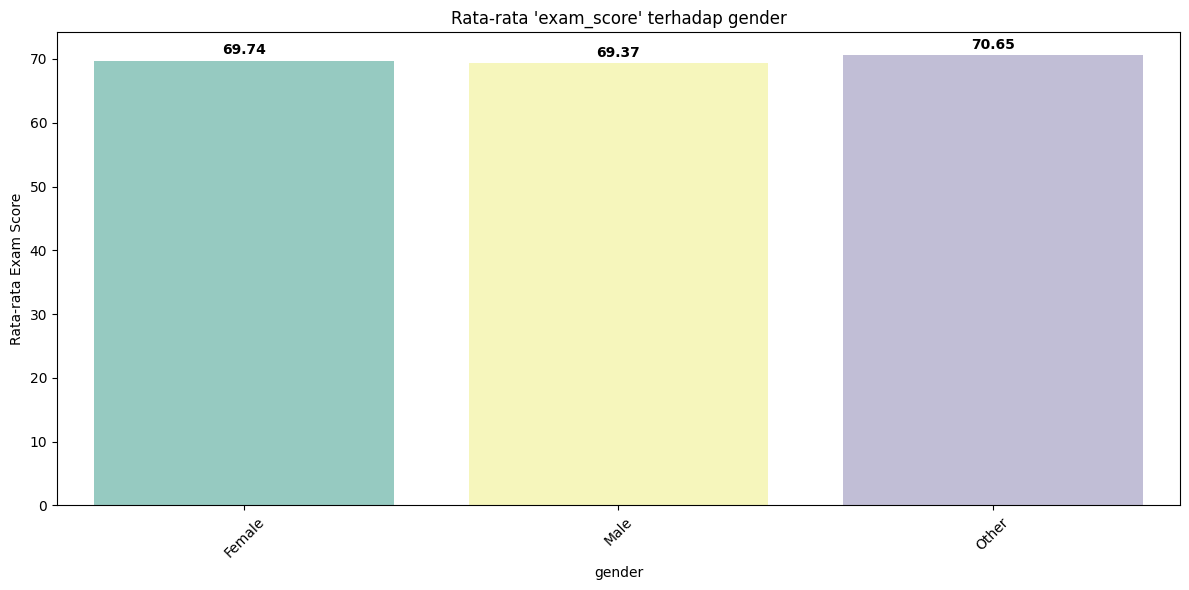

<ipython-input-12-c93b764cccca>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)
<ipython-input-12-c93b764cccca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)


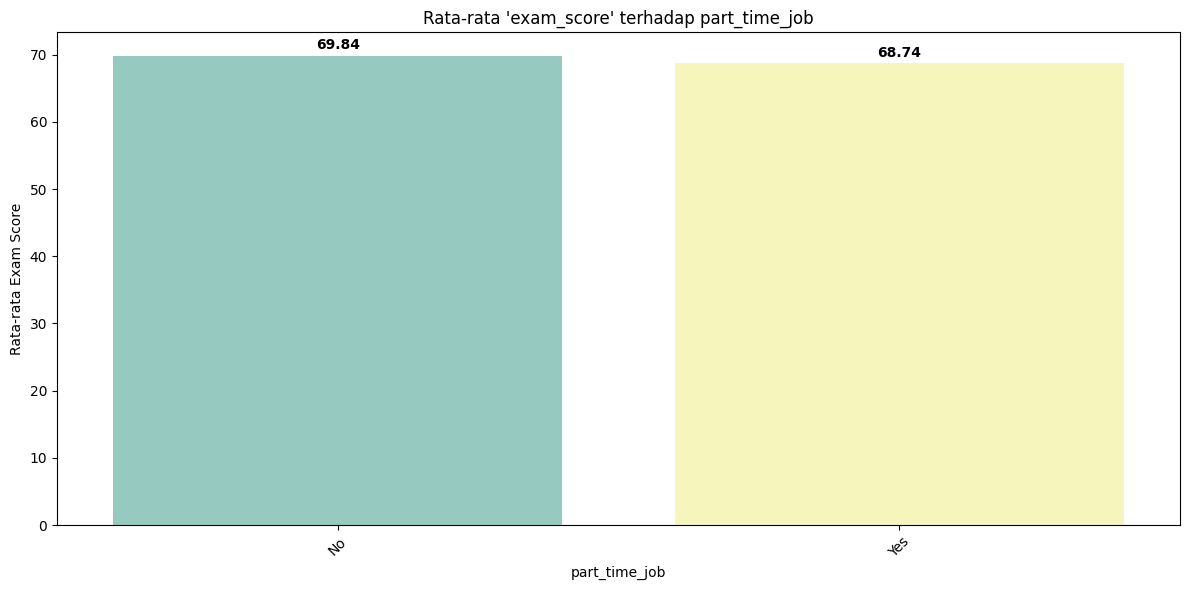

<ipython-input-12-c93b764cccca>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)
<ipython-input-12-c93b764cccca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)


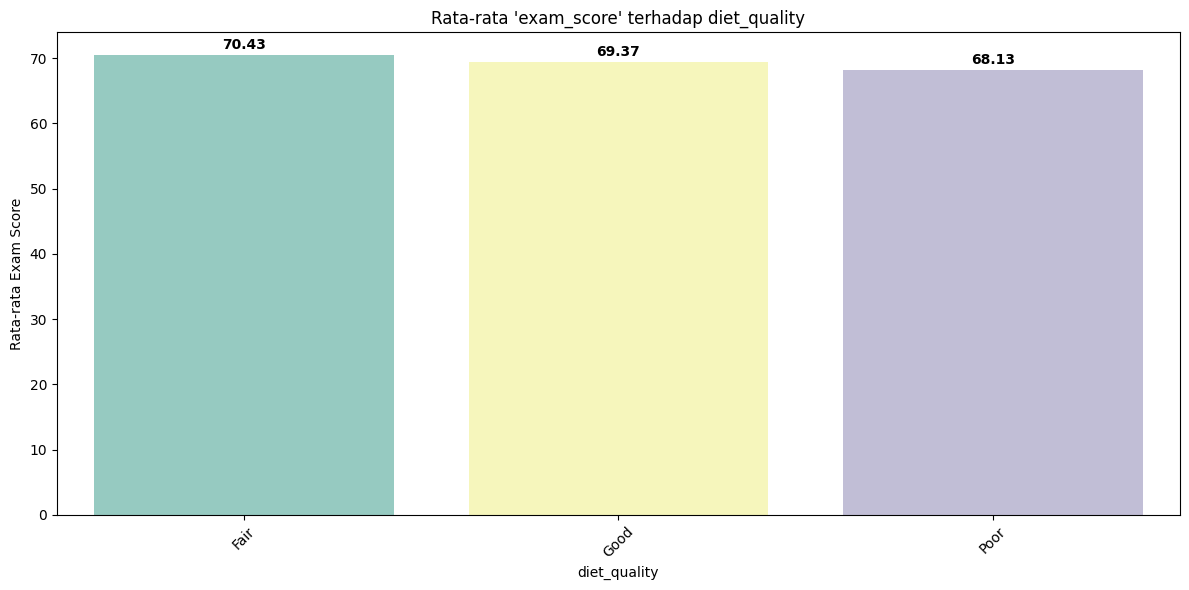

<ipython-input-12-c93b764cccca>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)
<ipython-input-12-c93b764cccca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)


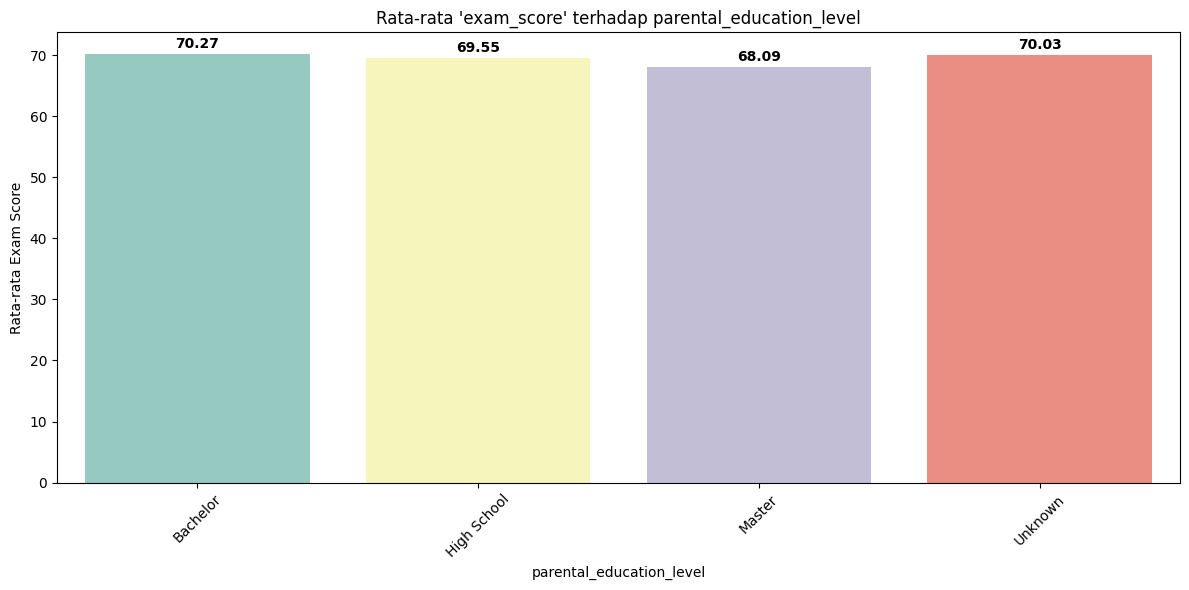

<ipython-input-12-c93b764cccca>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)
<ipython-input-12-c93b764cccca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)


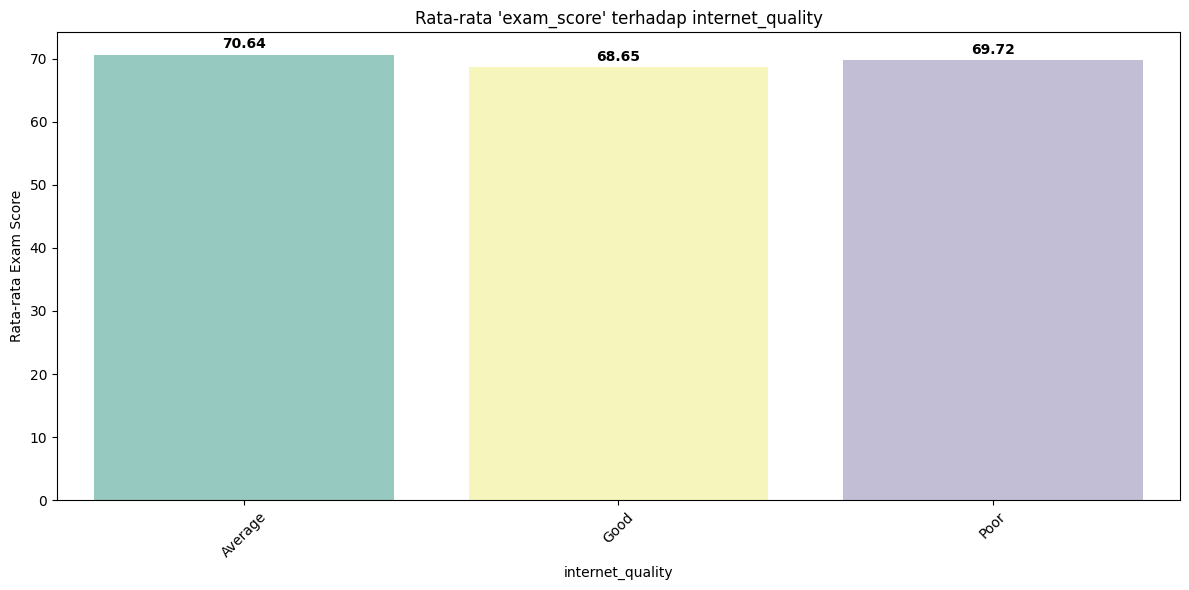

<ipython-input-12-c93b764cccca>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)
<ipython-input-12-c93b764cccca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)


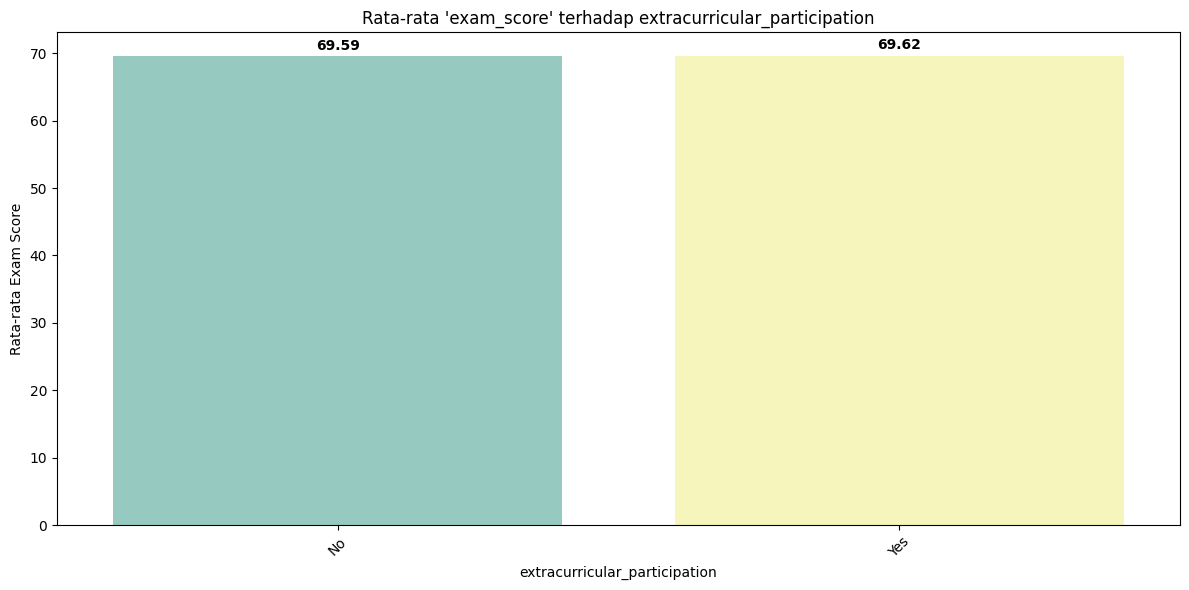

In [12]:
# Visualisasi rata-rata `exam_score` berdasarkan fitur kategorikal
for col in categorical_features:
    plt.figure(figsize=(12, 6))

    # Menghitung rata-rata `exam_score`
    data = df.groupby(col)['exam_score'].mean().reset_index()

    # Plot barplot
    ax = sns.barplot(x=col, y="exam_score", data=data, palette="Set3", ci=None)
    plt.title(f"Rata-rata 'exam_score' terhadap {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Rata-rata Exam Score")
    plt.xlabel(col)

    # Menampilkan rata-rata `exam_score` di atas bar
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        mean_score = round(height, 2)  # Membulatkan rata-rata exam_score
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Posisi x (tengah bar)
            height + 0.5,  # Posisi y (sedikit di atas bar)
            f'{mean_score}',  # Teks rata-rata exam_score
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
        )

    plt.tight_layout()
    plt.show()

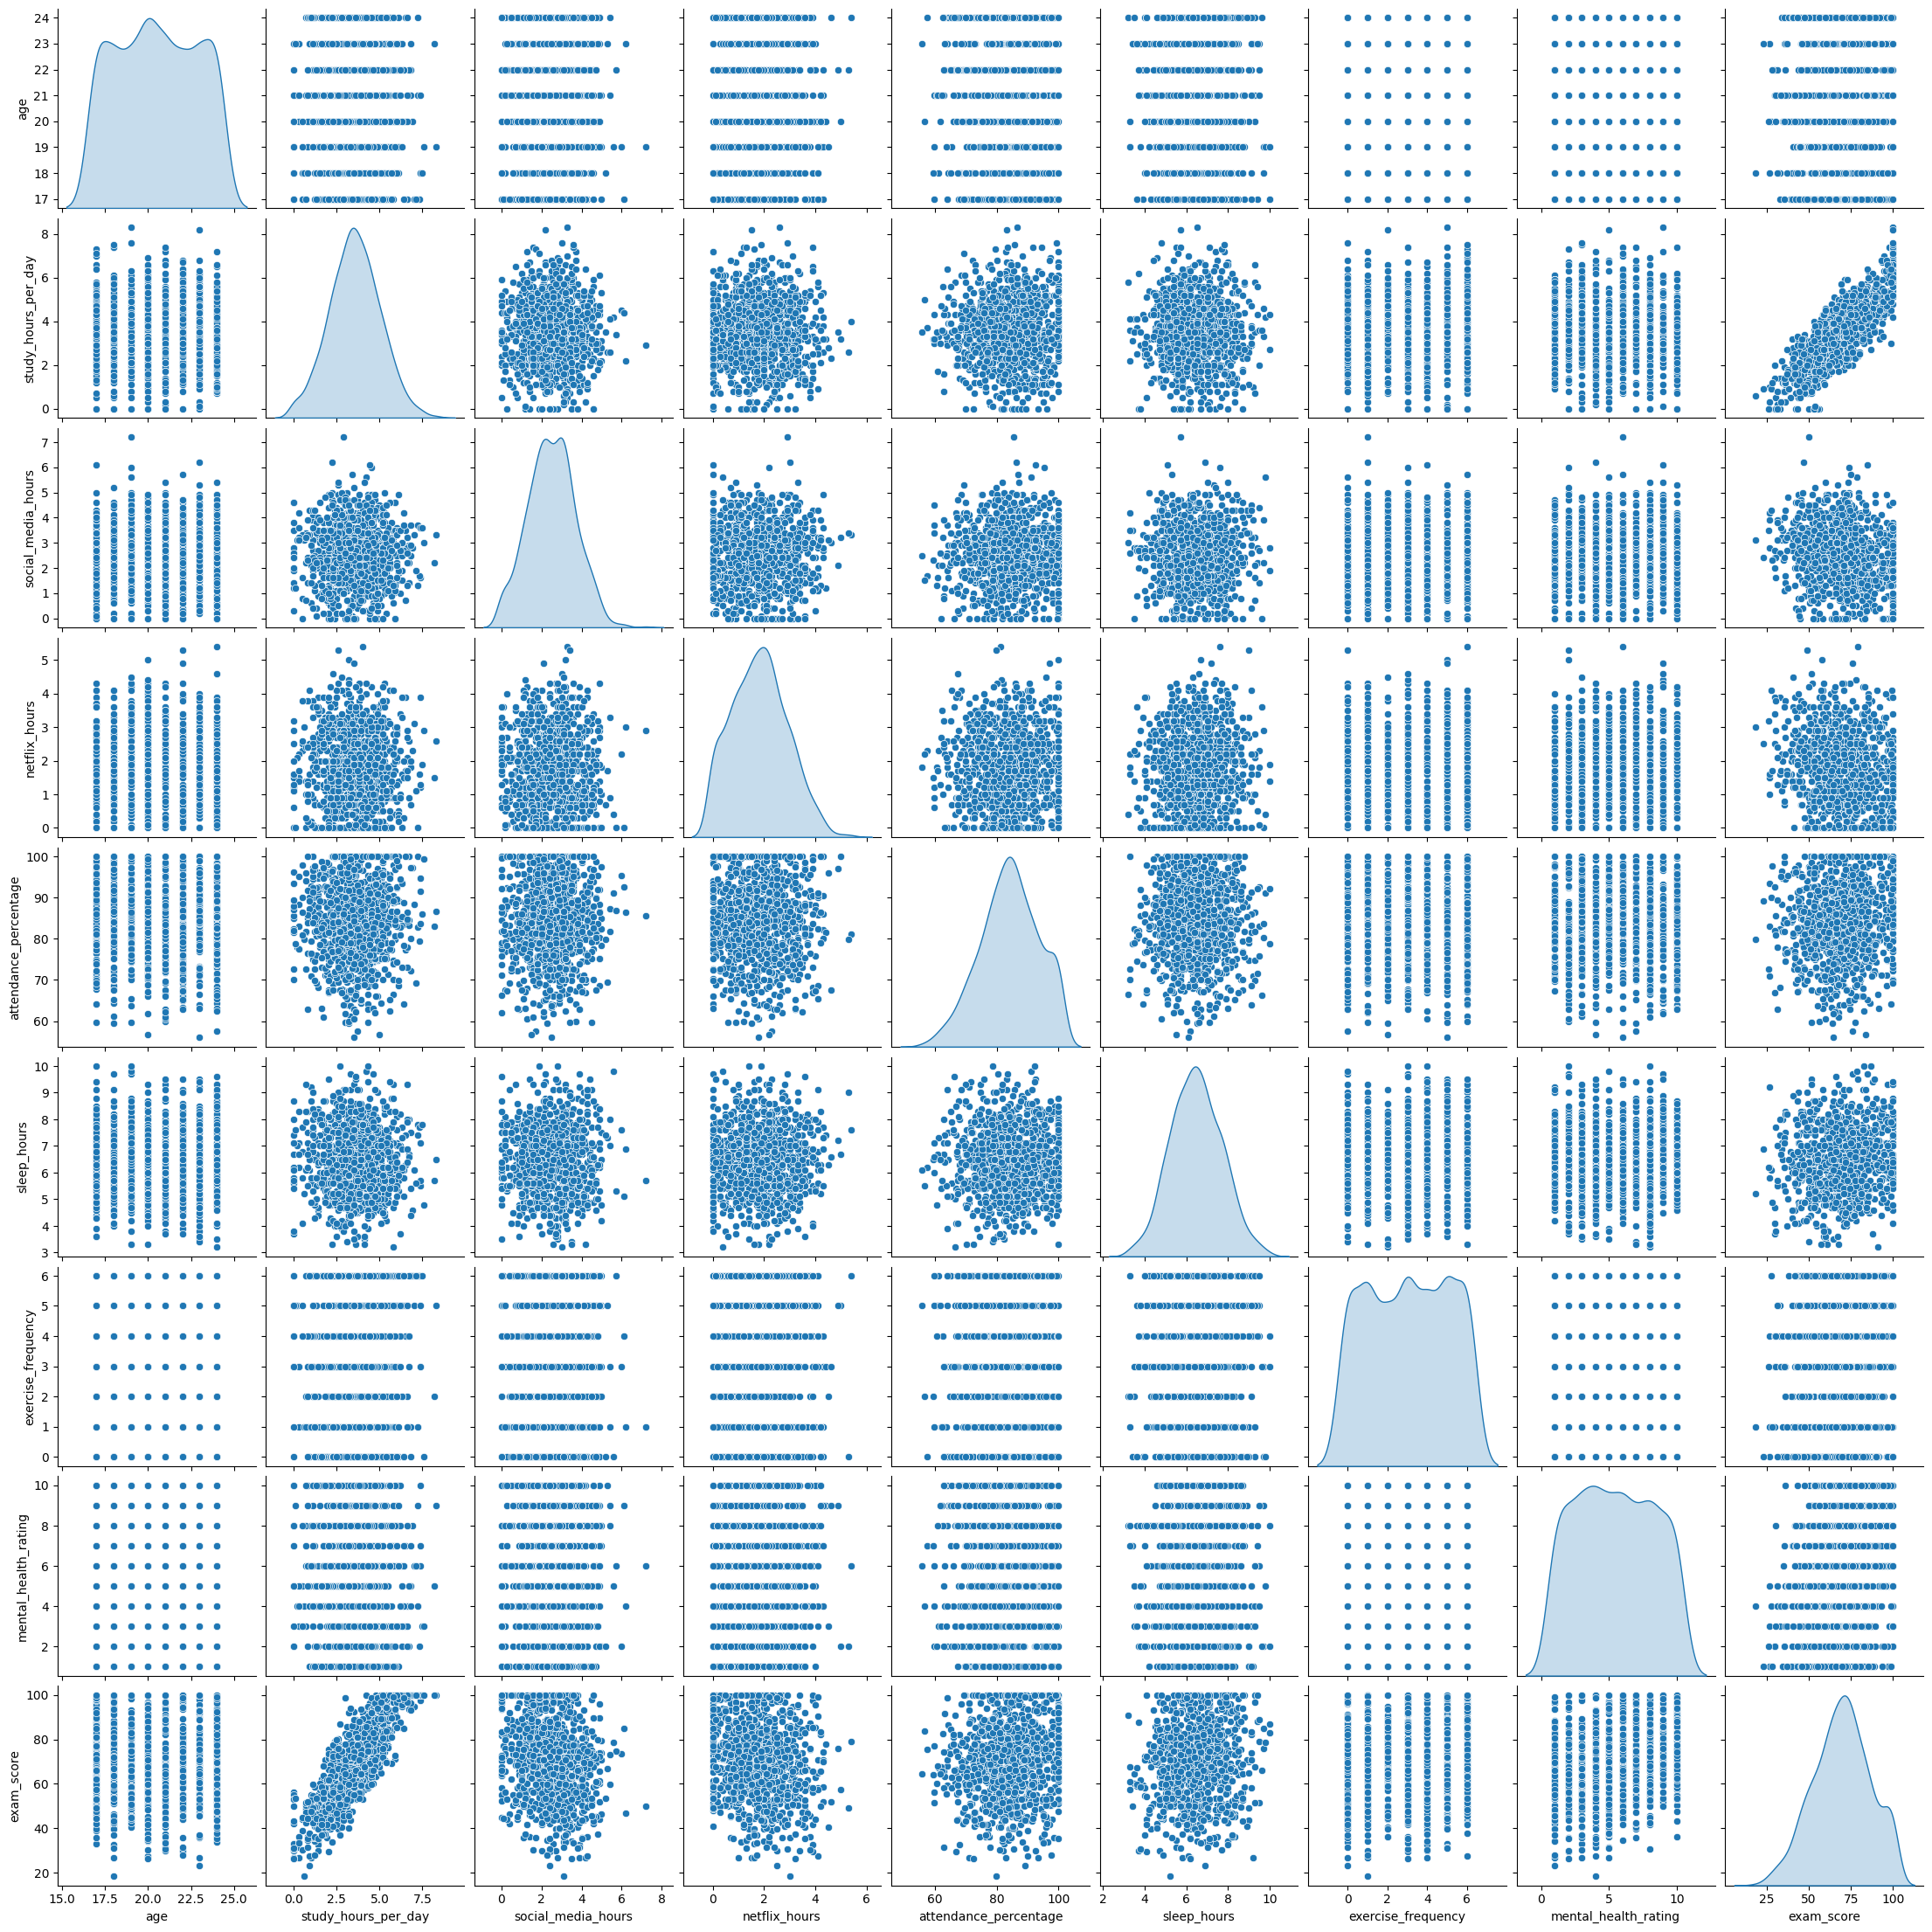

In [13]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

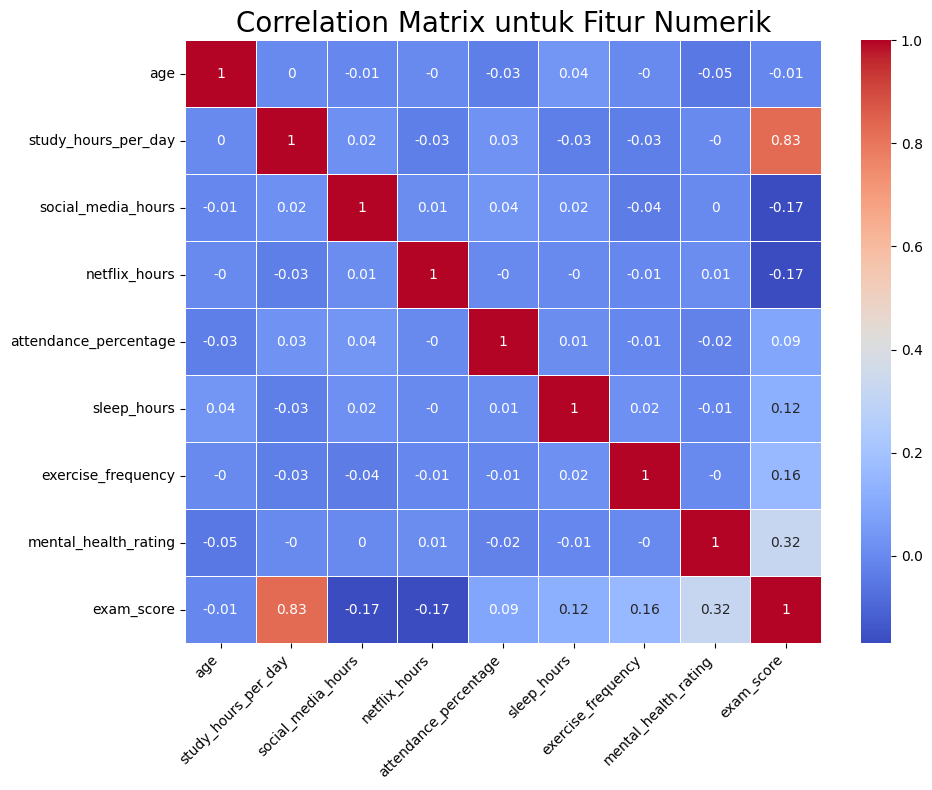

In [14]:
# Membuat heatmap untuk korelasi fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Plot heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Data Preparation

### Data Preprocessing

In [15]:
df.drop(['age'], inplace=True, axis=1)
df.drop(['student_id'], inplace=True, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1000 non-null   object 
 1   study_hours_per_day            1000 non-null   float64
 2   social_media_hours             1000 non-null   float64
 3   netflix_hours                  1000 non-null   float64
 4   part_time_job                  1000 non-null   object 
 5   attendance_percentage          1000 non-null   float64
 6   sleep_hours                    1000 non-null   float64
 7   diet_quality                   1000 non-null   object 
 8   exercise_frequency             1000 non-null   int64  
 9   parental_education_level       1000 non-null   object 
 10  internet_quality               1000 non-null   object 
 11  mental_health_rating           1000 non-null   int64  
 12  extracurricular_participation  1000 non-null   ob

In [16]:
label_features = ['diet_quality', 'parental_education_level', 'internet_quality']

# Inisialisasi Label Encoder
le = LabelEncoder()

# Melakukan Label Encoding
for feature in label_features:
    df[feature] = le.fit_transform(df[feature])

print("\nData setelah Label Encoding:")
df[label_features].head()


Data setelah Label Encoding:


,diet_quality,parental_education_level,internet_quality
0,0,2,0
1,1,1,0
2,2,1,2
3,2,2,1
4,0,2,1


In [17]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' untuk menghindari dummy variable trap

# Fitur nominal yang akan di-One Hot Encoding
one_hot_features = ['gender', 'part_time_job', 'extracurricular_participation']

# Melakukan One Hot Encoding
encoded_data = encoder.fit_transform(df[one_hot_features])

# Mendapatkan nama kolom hasil encoding
encoded_columns = encoder.get_feature_names_out(one_hot_features)

# Membuat DataFrame dari hasil encoding
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Menggabungkan hasil encoding ke DataFrame asli
df = pd.concat([df.drop(one_hot_features, axis=1), encoded_df], axis=1)

# Menampilkan hasil One Hot Encoding
print("\nData setelah One Hot Encoding:")
df.head()


Data setelah One Hot Encoding:


,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,0.0,1.2,1.1,85.0,8.0,0,6,2,0,8,56.2,0.0,0.0,0.0,1.0
1,6.9,2.8,2.3,97.3,4.6,1,6,1,0,8,100.0,0.0,0.0,0.0,0.0
2,1.4,3.1,1.3,94.8,8.0,2,1,1,2,1,34.3,1.0,0.0,0.0,0.0
3,1.0,3.9,1.0,71.0,9.2,2,4,2,1,1,26.8,0.0,0.0,0.0,1.0
4,5.0,4.4,0.5,90.9,4.9,0,3,2,1,1,66.4,0.0,0.0,0.0,0.0


In [18]:
numerical_features = ['study_hours_per_day', 'social_media_hours',
                      'netflix_hours', 'attendance_percentage', 'sleep_hours',
                      'exercise_frequency', 'mental_health_rating']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi (hanya untuk fitur numerik)
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Menampilkan hasil standarisasi
print("\nData setelah Standarisasi:")
df.head()


Data setelah Standarisasi:


,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,-2.418068,-1.114064,-0.669750,0.092426,1.248120,0,1.461166,2,0,0.900186,56.2,0.0,0.0,0.0,1.0
1,2.281707,0.251315,0.446965,1.401696,-1.525661,1,1.461166,1,0,0.900186,100.0,0.0,0.0,0.0,0.0
2,-1.464491,0.507324,-0.483631,1.135584,1.248120,2,-1.008689,1,2,-1.559339,34.3,1.0,0.0,0.0,0.0
3,-1.736942,1.190013,-0.762810,-1.397800,2.227102,2,0.473224,2,1,-1.559339,26.8,0.0,0.0,0.0,1.0
4,0.987566,1.616694,-1.228108,0.720450,-1.280916,0,-0.020747,2,1,-1.559339,66.4,0.0,0.0,0.0,0.0


### Split Dataset

In [19]:
X = df.drop('exam_score', axis=1)
y = df['exam_score']

# Membagi dataset menjadi training set (80%) dan testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (800, 14)
Ukuran X_test: (200, 14)
Ukuran y_train: (800,)
Ukuran y_test: (200,)


## Model Development

In [23]:
# === 1. Parameter distributions ===
param_distributions = {
    "Linear Regression": {
        "fit_intercept": [True, False],
        "copy_X": [True, False],
        "positive": [True, False]
    },
     "Random Forest": {
        "n_estimators": [50, 100, 150, 200],
        "max_depth": [3, 5, 7, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0]
    }
}

# === 2. Model list ===
model_list = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# === 3. Tuning, Training, Evaluation ===
results = []

for model_name, model in model_list.items():
    print(f"\nTuning {model_name}...")

    search = GridSearchCV(  # Use GridSearchCV instead for small parameter space
        estimator=model,
        param_grid=param_distributions[model_name],
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    # Melakukan pencarian hyperparameter terbaik
    search.fit(X_train, y_train)
    best_model = search.best_estimator_

    # Prediksi
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)

    # Evaluasi
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Menyimpan hasil evaluasi
    results.append({
        "Model": model_name,
        "Best Params": search.best_params_,
        "Train MSE": f"{train_mse:.2f}",
        "Test MSE": f"{test_mse:.2f}",
        "Train MAE": f"{train_mae:.2f}",
        "Test MAE": f"{test_mae:.2f}",
        "Train R2": f"{train_r2:.2f}",
        "Test R2": f"{test_r2:.2f}"
    })

    print(f"{model_name}: Train MSE = {train_mse:.2f}, Test MSE = {test_mse:.2f}, Train R2 = {train_r2:.2f}, Test R2 = {test_r2:.2f}")

# === 4. Simpan Results ===
df_results = pd.DataFrame(results)


Tuning Linear Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Linear Regression: Train MSE = 28.69, Test MSE = 26.24, Train R2 = 0.90, Test R2 = 0.90

Tuning Random Forest...
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Random Forest: Train MSE = 6.60, Test MSE = 38.39, Train R2 = 0.98, Test R2 = 0.85

Tuning Gradient Boosting...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Gradient Boosting: Train MSE = 14.15, Test MSE = 28.23, Train R2 = 0.95, Test R2 = 0.89


## Evaluasi Model

In [24]:
print("\nHasil Evaluasi Model:")
df_results


Hasil Evaluasi Model:


,Model,Best Params,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'posit...",28.69,26.24,4.22,4.15,0.90,0.90
1,Random Forest,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",6.60,38.39,2.07,4.94,0.98,0.85
2,Gradient Boosting,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",14.15,28.23,3.00,4.42,0.95,0.89
